# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "files/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [57]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [58]:
# Set up a new Data Frame to hold the values
cities_df = pd.DataFrame({
    "City": cities,
    "Cloudiness": "",
    "Country": "",
    "Date": "",
    "Humidity": "",
    "Lat": "",
    "Lng": "",
    "Max Temp": "",
    "Wind Speed": ""
})

cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-philippe,,,,,,,,
1,tasiilaq,,,,,,,,
2,busselton,,,,,,,,
3,kaihua,,,,,,,,
4,cheuskiny,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [59]:
# Starting statement as example
print("Beginning Data Retrieval")
print("-----------------------------")

# Set API key and create base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
   "Units": "Imperial",
    "APPID": api_key,
}

# Create a query url to use cities list data and generate each key items

for index, city in cities_df.iterrows():
    # Get City from df
    city_name = city["City"]
    
    # Add keyword to params dict
    params["q"] = city_name
    
    response = requests.get(base_url, params=params).json()
    
# Exception handling
    try:
        print(f"Processing Reocrd {index}| {city_name}.")
        # Parse response
        cities_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Date"] = response["dt"]
        cities_df.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_df.loc[index, "Lat"] = response["coord"]["lat"]
        cities_df.loc[index, "Lng"] = response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"] = response["wind"]["speed"]

    except(KeyError, ValueError):
        print("City not found. Skipping...")

Beginning Data Retrieval
-----------------------------
Processing Reocrd 0| saint-philippe.
Processing Reocrd 1| tasiilaq.
Processing Reocrd 2| busselton.
Processing Reocrd 3| kaihua.
Processing Reocrd 4| cheuskiny.
City not found. Skipping...
Processing Reocrd 5| gravelbourg.
Processing Reocrd 6| olinda.
Processing Reocrd 7| punta arenas.
Processing Reocrd 8| barrow.
Processing Reocrd 9| bredasdorp.
Processing Reocrd 10| pisco.
Processing Reocrd 11| hithadhoo.
Processing Reocrd 12| itarema.
Processing Reocrd 13| rikitea.
Processing Reocrd 14| saint george.
Processing Reocrd 15| albany.
Processing Reocrd 16| fare.
Processing Reocrd 17| samarai.
Processing Reocrd 18| bambous virieux.
Processing Reocrd 19| kaitangata.
Processing Reocrd 20| dipkarpaz.
City not found. Skipping...
Processing Reocrd 21| arraial do cabo.
Processing Reocrd 22| ushuaia.
Processing Reocrd 23| kavieng.
Processing Reocrd 24| severo-kurilsk.
Processing Reocrd 25| nizhneyansk.
City not found. Skipping...
Processing 

Processing Reocrd 227| chipinge.
Processing Reocrd 228| sitka.
Processing Reocrd 229| visby.
Processing Reocrd 230| nouadhibou.
Processing Reocrd 231| puerto escondido.
Processing Reocrd 232| lorengau.
Processing Reocrd 233| quelimane.
Processing Reocrd 234| salacgriva.
Processing Reocrd 235| port blair.
Processing Reocrd 236| cayenne.
Processing Reocrd 237| bereda.
Processing Reocrd 238| codrington.
Processing Reocrd 239| doctor arroyo.
Processing Reocrd 240| saravena.
Processing Reocrd 241| kamyshlov.
Processing Reocrd 242| mangochi.
Processing Reocrd 243| nevelsk.
Processing Reocrd 244| port augusta.
Processing Reocrd 245| tura.
Processing Reocrd 246| rancagua.
Processing Reocrd 247| achisay.
City not found. Skipping...
Processing Reocrd 248| lingao.
Processing Reocrd 249| lethem.
Processing Reocrd 250| kingman.
Processing Reocrd 251| druzhba.
Processing Reocrd 252| muromtsevo.
Processing Reocrd 253| corinto.
Processing Reocrd 254| mazagao.
Processing Reocrd 255| merrill.
Processing

Processing Reocrd 455| noumea.
Processing Reocrd 456| salalah.
Processing Reocrd 457| victoria point.
Processing Reocrd 458| cabo san lucas.
Processing Reocrd 459| umm lajj.
Processing Reocrd 460| wadena.
Processing Reocrd 461| teguise.
Processing Reocrd 462| caceres.
Processing Reocrd 463| roebourne.
Processing Reocrd 464| namibe.
Processing Reocrd 465| dryden.
Processing Reocrd 466| jumla.
Processing Reocrd 467| juegang.
Processing Reocrd 468| ginda.
Processing Reocrd 469| thompson.
Processing Reocrd 470| sambava.
Processing Reocrd 471| santa maria.
Processing Reocrd 472| dunedin.
Processing Reocrd 473| bengkulu.
City not found. Skipping...
Processing Reocrd 474| vardo.
Processing Reocrd 475| macaboboni.
City not found. Skipping...
Processing Reocrd 476| belomorsk.
Processing Reocrd 477| naze.
Processing Reocrd 478| ihosy.
Processing Reocrd 479| kyren.
Processing Reocrd 480| madaoua.
Processing Reocrd 481| vila franca do campo.
Processing Reocrd 482| tigil.
Processing Reocrd 483| uti

In [60]:
# Replace all blank rows with NaN then drop them
cities_df.replace("", np.nan, inplace=True)
cities_df = cities_df.dropna(how="any")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [61]:
# Making sure all row matched up
cities_df.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [62]:
# Create dataframe with city_data
cities_df["Date"] = cities_df["Date"].astype("str")

# Export csv file
cities_df.to_csv("WeatherPy_df.csv")

cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-philippe,90.0,CA,1549176300.0,91.0,45.36,-73.48,260.150,1.00
1,tasiilaq,88.0,GL,1549173000.0,62.0,65.61,-37.64,269.150,9.30
2,busselton,0.0,AU,1549176959.0,81.0,-33.64,115.35,296.562,6.12
3,kaihua,92.0,CN,1549176959.0,80.0,29.14,118.41,291.987,3.70
5,gravelbourg,24.0,CA,1549176959.0,83.0,49.88,-106.56,253.237,5.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

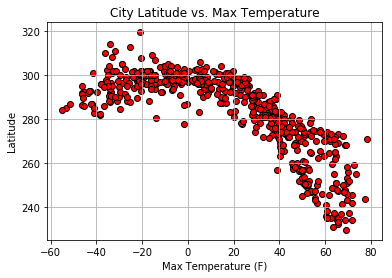

<Figure size 432x288 with 0 Axes>

In [65]:
# Latitude vs Temp
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], color="r", edgecolor="k")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.grid()

# Show plot
plt.show()

# Save the figure
plt.savefig('../images/Lat_Temp.png')


#### Latitude vs. Humidity Plot

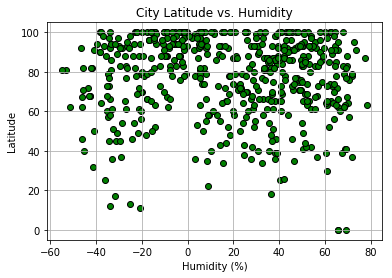

In [66]:
# Latitude vs humidity
plt.scatter(cities_df["Lat"], cities_df["Humidity"], color="g", edgecolor="k")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../images/Lat_Hum.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

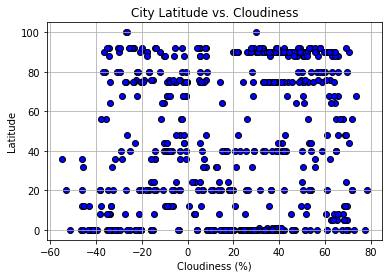

In [67]:
# Latitude vs cloudiness
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], color="b", edgecolor="k")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../images/Lat_Cloud.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

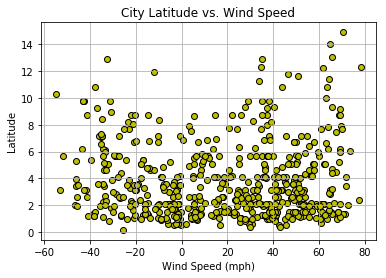

In [68]:
# Latitude vs wind speed
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], color="y", edgecolor="k")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../images/Lat_Wind.png")

# Show plot
plt.show()

# Observations

*For the city that is closer to the equator show significantly warmer weather.
*For the city that is closer to the equator also show less humidity.
*Due to the warmer weather for those city that is closwer to equator, wind speed tend to be higher because air temperature affect air current.
*There is no clear indication show the relationship between latitude and temperarture.